# **SBV Southern Italy**

#         - - - - - - - - - - - - - - - - - - - - - - - - - - ----------   **PART ONE**   ---------- - - - - - - - - - - - - - - - - - - - - - - - - - -

# Step 1: Import Libraries

In [86]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 2: Load and Preprocess Data

In [71]:
from google.colab import files
uploaded = files.upload()

Saving schmallenberg virus infection in southern Italy_812_Ferrara_2023.xlsx to schmallenberg virus infection in southern Italy_812_Ferrara_2023 (2).xlsx


In [87]:
# Load the data (assuming it is an Excel file)
df = pd.read_excel('schmallenberg virus infection in southern Italy_812_Ferrara_2023.xlsx')

# Display the first few rows to verify the data
df.head(2)

,AGE,OUTCOME,PROVINCE,SPECIES,LOCATION,ID ALL,ORIGIN,TYPE,ID ALL.1,AGE BINARY,Temperatura media,cm Rainfall,altitude,Distance from the coast
0,8,1,SA,BUFFALO,Capaccio,025SA147,Born in the farm,Stallfed,UNO,ADULT,>16,>1000,>250m,< 20
1,14,1,SA,BUFFALO,Serre,140SA166,Born in the farm,Stallfed,DUE,ADULT,<16,>1000,<250m,> 20


In [88]:
# Drop irrelevant columns
df.drop(['ID ALL', 'ID ALL.1', 'PROVINCE'], axis=1, inplace=True)

🧧 **Re-Order**

In [89]:
# Reorder the columns in a more logical order
df = df[['AGE', 'AGE BINARY', 'ORIGIN', 'LOCATION', 'TYPE',
         'SPECIES', 'OUTCOME', 'Temperatura media',
         'cm Rainfall', 'altitude', 'Distance from the coast']]

# 🧧: 🧧: 🧧: 🧧: 🧧: **Label Encoder** 🧧: 🧧: 🧧: 🧧: 🧧:

In [90]:
# Convert categorical columns to numeric
# Encode categorical variables using LabelEncoder or mappings
# LabelEncoder
label_encoder = LabelEncoder()

# Encoding categorical variables
df['ORIGIN'] = label_encoder.fit_transform(df['ORIGIN'])
df['TYPE'] = label_encoder.fit_transform(df['TYPE'])
df['SPECIES'] = label_encoder.fit_transform(df['SPECIES'])
df['LOCATION'] = label_encoder.fit_transform(df['LOCATION'])

# Mapping
df['AGE BINARY'] = df['AGE BINARY'].map({'ADULT': 1, 'YOUNG': 0})
df['Temperatura media'] = df['Temperatura media'].map({'>16': 1, '<16': 0})
df['cm Rainfall'] = df['cm Rainfall'].map({'>1000': 1, '<1000': 0})
df['altitude'] = df['altitude'].map({'>250m': 1, '<250m': 0})
df['Distance from the coast'] = df['Distance from the coast'].map({'> 20': 1, '< 20': 0})

# Verify there are no more missing values
print(df.isnull().sum())

AGE                        0
AGE BINARY                 0
ORIGIN                     0
LOCATION                   0
TYPE                       0
SPECIES                    0
OUTCOME                    0
Temperatura media          0
cm Rainfall                0
altitude                   0
Distance from the coast    0
dtype: int64


In [91]:
df.head(2)

,AGE,AGE BINARY,ORIGIN,LOCATION,TYPE,SPECIES,OUTCOME,Temperatura media,cm Rainfall,altitude,Distance from the coast
0,8,1,0,8,1,0,1,1,1,1,0
1,14,1,0,29,1,0,1,0,1,0,1


# Step 3: Feature Selection and Data Splitting

In [92]:
# Feature selection: Drop the target column and select relevant features
X = df.drop('OUTCOME', axis=1)  # Features
y = df['OUTCOME']  # Target variable

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Model Training

In [96]:
# Initialize models
tree_model = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=3)
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train models
tree_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)
# Train XGBoost without the deprecated parameter
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
print("XGBoost model retrained without the deprecated parameter.")


print("All models trained successfully.")

XGBoost model retrained without the deprecated parameter.
All models trained successfully.


# Step 5: Model Evaluation

In [97]:
# Define a function for model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f'Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, AUC: {auc:.4f}')
    print(classification_report(y_test, y_pred))
    return accuracy, f1, auc

# Evaluate each model
print("Decision Tree Evaluation:")
evaluate_model(tree_model, X_test, y_test)

print("KNN Evaluation:")
evaluate_model(knn_model, X_test, y_test)

print("Logistic Regression Evaluation:")
evaluate_model(logistic_model, X_test, y_test)

print("XGBoost Evaluation:")
evaluate_model(xgb_model, X_test, y_test)

Decision Tree Evaluation:
Accuracy: 0.6680, F1 Score: 0.5371, AUC: 0.6922
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       145
           1       0.62      0.47      0.54        99

    accuracy                           0.67       244
   macro avg       0.65      0.64      0.64       244
weighted avg       0.66      0.67      0.66       244

KNN Evaluation:
Accuracy: 0.5861, F1 Score: 0.5258, AUC: 0.6360
              precision    recall  f1-score   support

           0       0.67      0.60      0.63       145
           1       0.49      0.57      0.53        99

    accuracy                           0.59       244
   macro avg       0.58      0.58      0.58       244
weighted avg       0.60      0.59      0.59       244

Logistic Regression Evaluation:
Accuracy: 0.5984, F1 Score: 0.3194, AUC: 0.5656
              precision    recall  f1-score   support

           0       0.62      0.85      0.72       145
           1       

(0.6229508196721312, 0.5533980582524272, 0.6589341692789968)

# Step 6: Cross-Validation

In [98]:
# Perform 10-fold cross-validation for each model
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Cross-validate each model
models = {
    'Decision Tree': tree_model,
    'KNN': knn_model,
    'Logistic Regression': logistic_model,
    'XGBoost': xgb_model
}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print(f'{name}: Cross-Validation Accuracy = {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

Decision Tree: Cross-Validation Accuracy = 0.6445 ± 0.0809
KNN: Cross-Validation Accuracy = 0.6199 ± 0.0658
Logistic Regression: Cross-Validation Accuracy = 0.6092 ± 0.0656
XGBoost: Cross-Validation Accuracy = 0.6304 ± 0.0383


#         - - - - - - - - - - - - - - - - - - - - - - - - - - ----------   **PART TWO**   ---------- - - - - - - - - - - - - - - - - - - - - - - - - - -

# Step 7: Model Interpretability Using SHAP

In [100]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.8 MB/s eta 0:00:00


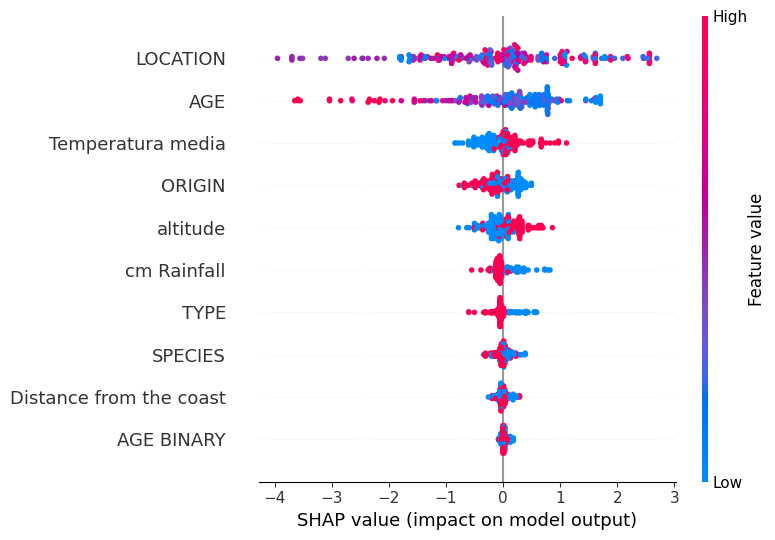

In [101]:
import shap

# Create a SHAP explainer for XGBoost model
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot for SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Step 8: Visualization of ROC Curve

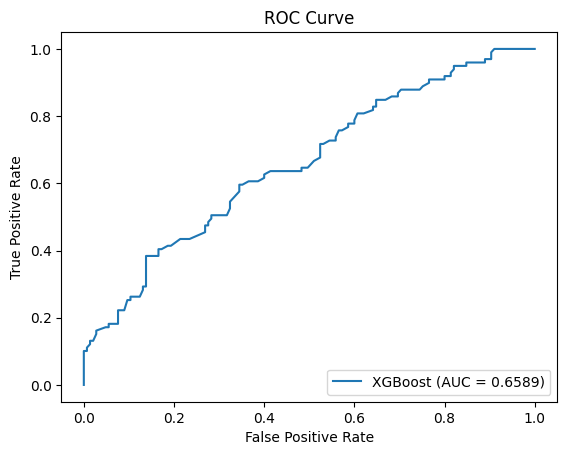

In [102]:
# Plot ROC curve for XGBoost model
fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]):.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()